# Logistic Regression

## Data Source and Contents

In [135]:
# import packacges
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [136]:
# read dataset
df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [137]:
# inspect dataset
df.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


## Binary Classifier Model

In [138]:
# select datasets to split
X = df.drop(['cvd_4types'], axis = 1)
y = df.cvd_4types

In [139]:
# split datasets into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [140]:
# fit the Logistic Regression model
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
# make predictions using testing data
y_pred = lr.predict(X_test)

## Feature Importance

In [142]:
# find coefficients
lr.coef_

array([[-0.00289119, -1.0303853 ,  0.17592962, -0.13906428, -0.05892778,
        -0.0509074 ,  0.08117157, -0.02964407, -0.00166958, -0.03489279,
         0.15896183,  0.6914489 ,  0.15544728, -0.1268546 ,  0.03620465,
        -0.56314573]])

In [143]:
# store coefficients in dictionary
coef_dict = list(zip(X, lr.coef_[0, :]))
coef_dict

[('age_s1', -0.002891194419059289),
 ('race', -1.0303853027956604),
 ('educat', 0.17592961627087106),
 ('mstat', -0.13906428314809258),
 ('hip', -0.058927782565267456),
 ('neck20', -0.050907398831702554),
 ('waist', 0.08117156814557057),
 ('av_weight_kg', -0.029644068283408136),
 ('cgpkyr', -0.0016695806454574552),
 ('tea15', -0.03489278528847577),
 ('srhype', 0.1589618255529231),
 ('parrptdiab', 0.6914489026399077),
 ('bend25', 0.15544728292617244),
 ('happy25', -0.12685459742712885),
 ('tired25', 0.03620464641038352),
 ('hlthlm25', -0.5631457288577678)]

In [144]:
# display coefficients in table
coef_table = pd.DataFrame(coef_dict, columns = ['Feature', 'Coefficient'])
coef_table

,Feature,Coefficient
0,age_s1,-0.002891
1,race,-1.030385
2,educat,0.175930
3,mstat,-0.139064
4,hip,-0.058928
5,neck20,-0.050907
6,waist,0.081172
7,av_weight_kg,-0.029644
8,cgpkyr,-0.001670
9,tea15,-0.034893


In [145]:
# sort coefficients by feature importance
coef_table.sort_values(by = 'Coefficient', key = abs, ascending = False)

,Feature,Coefficient
1,race,-1.030385
11,parrptdiab,0.691449
15,hlthlm25,-0.563146
2,educat,0.175930
10,srhype,0.158962
12,bend25,0.155447
3,mstat,-0.139064
13,happy25,-0.126855
6,waist,0.081172
4,hip,-0.058928


## Evaluating Performance

In [146]:
# Logistic Regression accuracy
lr.score(X_train, y_train)

0.6910736322501029

In [147]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('True Negatives:', cm[0,0])
print('True Positives:', cm[1,1])
print('False Negatives:', cm[1,0])
print('False Positives:', cm[0,1])

True Negatives: 168
True Positives: 411
False Negatives: 65
False Positives: 167


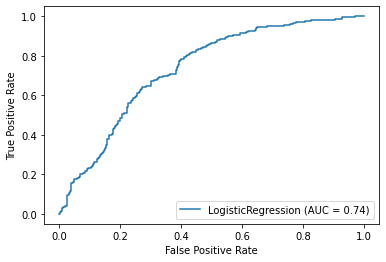

In [148]:
# ROC Curve
metrics.plot_roc_curve(lr, X_test, y_test)